In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Company.csv')
df.head()

,EmpID,BusinessTravel,Department,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,2102210,Travel_Rarely,Sales,94,2.0,Sales Executive,4,19479,8,Yes,11,8,1.0,6,4,0,5,Yes
1,2102211,Travel_Frequently,Research & Development,61,2.0,Research Scientist,2,24907,1,No,23,10,3.0,10,7,1,7,No
2,2102212,Travel_Rarely,Research & Development,92,1.0,Laboratory Technician,3,2396,6,Yes,15,7,3.0,0,0,0,0,Yes
3,2102213,Travel_Frequently,Research & Development,56,1.0,Research Scientist,3,23159,1,Yes,11,8,3.0,8,7,3,0,No
4,2102214,Travel_Rarely,Research & Development,40,1.0,Laboratory Technician,2,16632,9,No,12,6,3.0,2,2,2,2,No


In [8]:
df.isnull().sum()

EmpID                      0
BusinessTravel             0
Department                 0
HourlyRate                 0
JobLevel                   6
JobRole                    0
JobSatisfaction            0
MonthlyRate                0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
TotalWorkingYears          0
WorkLifeBalance            4
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

In [9]:
df.drop(columns='JobLevel',axis=0,inplace=True)

In [10]:
df.head()

,EmpID,BusinessTravel,Department,HourlyRate,JobRole,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,2102210,Travel_Rarely,Sales,94,Sales Executive,4,19479,8,Yes,11,8,1.0,6,4,0,5,Yes
1,2102211,Travel_Frequently,Research & Development,61,Research Scientist,2,24907,1,No,23,10,3.0,10,7,1,7,No
2,2102212,Travel_Rarely,Research & Development,92,Laboratory Technician,3,2396,6,Yes,15,7,3.0,0,0,0,0,Yes
3,2102213,Travel_Frequently,Research & Development,56,Research Scientist,3,23159,1,Yes,11,8,3.0,8,7,3,0,No
4,2102214,Travel_Rarely,Research & Development,40,Laboratory Technician,2,16632,9,No,12,6,3.0,2,2,2,2,No


In [11]:
df.drop(columns='WorkLifeBalance',axis=0,inplace=True)

In [12]:
df.isnull().sum()

EmpID                      0
BusinessTravel             0
Department                 0
HourlyRate                 0
JobRole                    0
JobSatisfaction            0
MonthlyRate                0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['Attrition']+69*.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

**EDA**

In [15]:
df.columns

Index(['EmpID', 'BusinessTravel', 'Department', 'HourlyRate', 'JobRole',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [16]:
pd.crosstab(df.Department,df.Attrition)

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [17]:
pd.crosstab(df.JobRole, df.OverTime)

OverTime,No,Yes
JobRole,,
Healthcare Representative,94,37
Human Resources,39,13
Laboratory Technician,197,62
Manager,75,27
Manufacturing Director,106,39
Research Director,57,23
Research Scientist,195,97
Sales Executive,232,94
Sales Representative,59,24


In [18]:
pd.crosstab(df.BusinessTravel,df.Department)

Department,Human Resources,Research & Development,Sales
BusinessTravel,,,
Non-Travel,6,97,47
Travel_Frequently,11,182,84
Travel_Rarely,46,682,315


In [19]:
pd.crosstab(df.BusinessTravel,df.JobRole)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
BusinessTravel,,,,,,,,,
Non-Travel,15,4,28,12,13,6,28,39,5
Travel_Frequently,26,10,51,13,29,12,54,59,23
Travel_Rarely,90,38,180,77,103,62,210,228,55


In [20]:
df.pivot_table(index= 'BusinessTravel',
               columns='JobRole',values= 'YearsInCurrentRole',aggfunc='count')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
BusinessTravel,,,,,,,,,
Non-Travel,15,4,28,12,13,6,28,39,5
Travel_Frequently,26,10,51,13,29,12,54,59,23
Travel_Rarely,90,38,180,77,103,62,210,228,55


**Visualizations**

<AxesSubplot:ylabel='Attrition'>

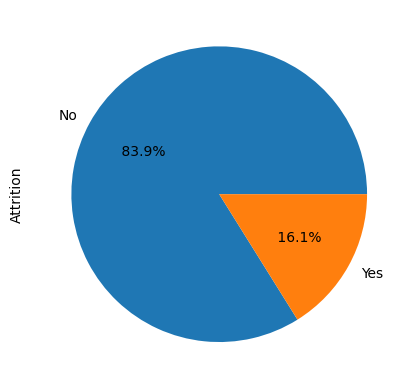

In [21]:
df['Attrition'].value_counts().plot(kind = 'pie',autopct =' %1.1f%%')

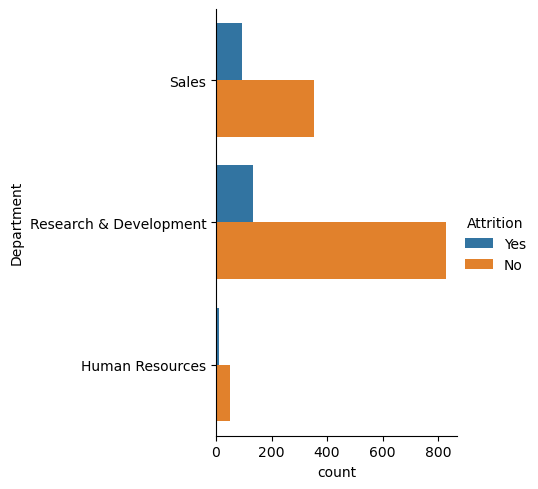

In [22]:
sns.catplot(data = df, y = 'Department',hue = 'Attrition', kind='count')

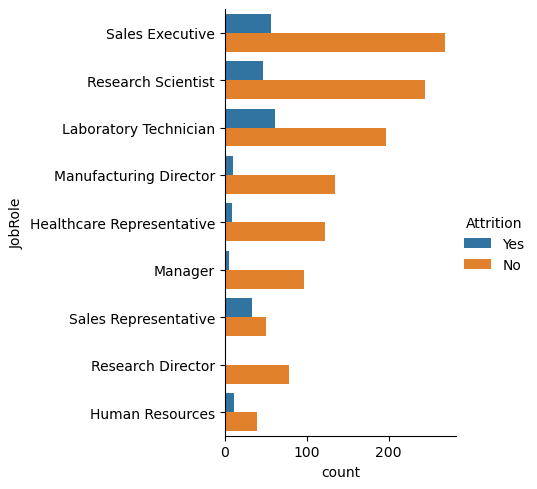

In [23]:
sns.catplot(data = df, y = 'JobRole',hue = 'Attrition', kind='count')

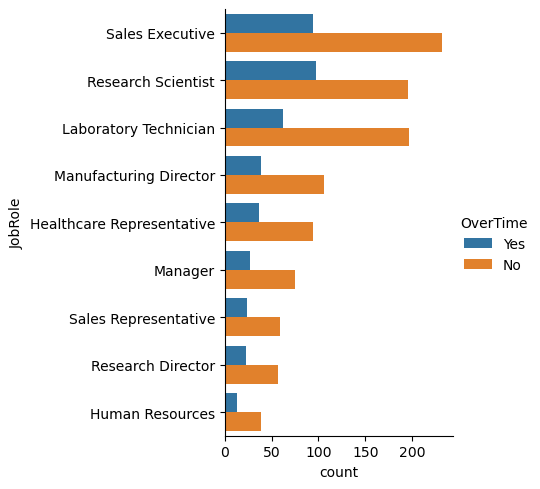

In [24]:
sns.catplot(data = df, y = 'JobRole',hue = 'OverTime', kind='count')

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='JobRole'>

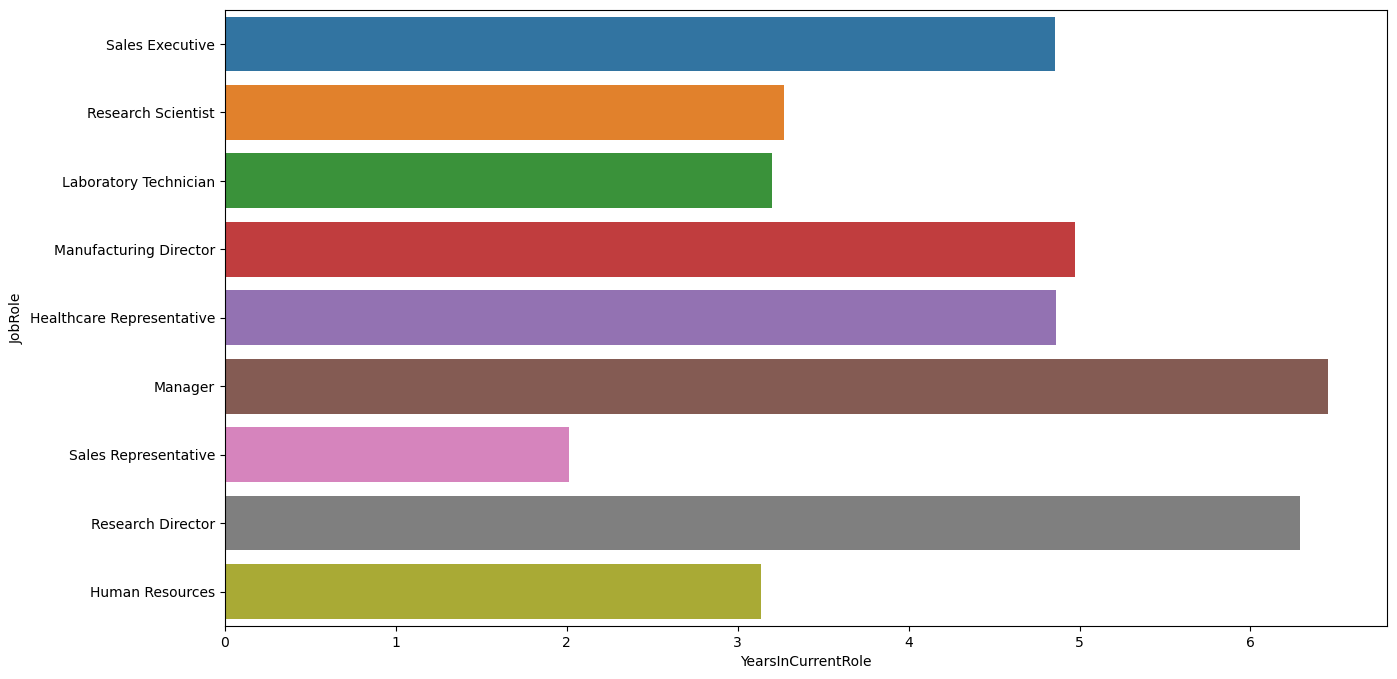

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,y= 'JobRole',x = 'YearsInCurrentRole',ci=False)

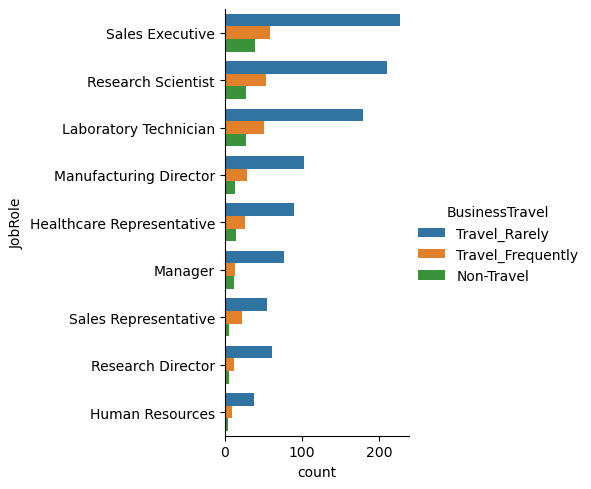

In [26]:
sns.catplot(data = df, y = 'JobRole',hue = 'BusinessTravel', kind='count')

In [27]:
dummies = pd.get_dummies(data = df,drop_first = True)
dummies.head()

,EmpID,HourlyRate,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Attrition_Yes
0,2102210,94,4,19479,8,11,8,6,4,0,...,0,0,0,0,0,0,1,0,1,1
1,2102211,61,2,24907,1,23,10,10,7,1,...,0,0,0,0,0,1,0,0,0,0
2,2102212,92,3,2396,6,15,7,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2102213,56,3,23159,1,11,8,8,7,3,...,0,0,0,0,0,1,0,0,1,0
4,2102214,40,2,16632,9,12,6,2,2,2,...,0,1,0,0,0,0,0,0,0,0


**Model Building**

In [28]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [29]:
X = dummies.drop('Attrition_Yes',axis=1)
y= dummies['Attrition_Yes']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
logit = LogisticRegression(solver = 'newton-cg', n_jobs=-1)
logit.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, solver='newton-cg')

In [32]:
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       863
           1       0.65      0.22      0.33       166

    accuracy                           0.86      1029
   macro avg       0.76      0.60      0.63      1029
weighted avg       0.83      0.86      0.82      1029



In [34]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       370
           1       0.70      0.23      0.34        71

    accuracy                           0.86       441
   macro avg       0.78      0.60      0.63       441
weighted avg       0.84      0.86      0.83       441



Here we can see that test recall also model error which is 23-100 = 77% which is too high and we know the random error is 
84% even ME < RE we need to reduce the error also by removing the p-value  greater than 0.05 or we can add class weight by swaping 
the error

In [35]:
x = dummies.drop('Attrition_Yes',axis=1)
y= dummies['Attrition_Yes']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
logit = LogisticRegression(solver = 'newton-cg', n_jobs=-1, class_weight={0:0.16, 1:0.84})
logit.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.16, 1: 0.84}, n_jobs=-1,
                   solver='newton-cg')

In [39]:
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       863
           1       0.34      0.76      0.47       166

    accuracy                           0.72      1029
   macro avg       0.64      0.74      0.64      1029
weighted avg       0.84      0.72      0.76      1029



In [41]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       370
           1       0.34      0.72      0.47        71

    accuracy                           0.73       441
   macro avg       0.64      0.73      0.64       441
weighted avg       0.84      0.73      0.77       441



By this recall test result we can see the ME is 0.72 which is 72 - 100 is 28% we can say logistic regression performs better